# Análisis de series de tiempo

Una de las principales preguntas que puede surgir al momento de iniciar esta semana, es el por qué de esta nueva sección que analiza de forma diferente los datos cuando ya hemos cubierto problemas donde la variable es de corte numérica y contínua en el modelo de Regresión Lineal.

La principal respuesta es que el análisis de series de tiempo reconoce la autocorrelación entre eventos de tiempo, que  pudiese existir, mientras que en el modelo de Regresión Lineal asumimos, o minimizamos, la independencia de los errores de serie analizada. Por ello, una de las principales diferencias entre el enfoque de regresión lineal y el de series de tiempo es que en el primero, estudiamos a una variable que está ordenada en el tiempo, mientras que en el modelo de Regresión Lineal, no siempre es así. Recordemos el ejemplo del precio de los inmuebles, que consistía en el análisis de esos datos sin la variable de tiempo. 

Sin embargo, esto no quiere decir que _no_ podemos aplicar modelos de regresión a series temporales, si quisiéramos tomar esa vía, lo que se recomienda es que la autocorrelación sea nula o baja, o se encuentre una variable oculta que explique la autocorrelación. De igual forma, se recomienda incluir variables transformadas, como la diferenciación de la serie, o variables estacionales ficticias para controlar por los componentes de tendencia o cíclicos en el modelo de regresión, pero esto lo acerca más al análisis de series de tiempo que al de regresión.


De hecho, una de las razones para usar modelos series de tiempo, es que es poco probable que se cumplan los supuestos de error que subyacen en el modelo de regresión lineal, en particular la falta de correlación serial.



### Conceptos

- Regresión: Es una herramienta utilizada para evaluar la relación de una variable dependiente en relación con múltiples variables independientes, es decir, su objetivo es inferir las relaciones que existen entre la variable dependiente y las variables independentes, por lo que la regresión analizará la media de la variable dependiente en relación con los cambios en las variables independientes
- Serie de tiempo: Mide los datos de una serie durante un período de tiempo específico, por lo que el valor del período de tiempo anterior es (casi siempre) un buen predictor del valor del período actual


#### ¿Entonces qué es una serie de tiempo y dónde está su valor agregado?

Series de tiempo es el estudio de aquellos datos que *dependen del tiempo o que cambian con el tiempo*. Este particular nos permite usar como insumo a los valores pasados para predecir el futuro a través de patrones que se repiten con el tiempo. Cabe recalcar que esta predicción, también incluirá al tiempo como variable.

Una forma sencilla de evaluar si una serie podría ser un buen candidato para el análisis por series de tiempo consiste en evaluar si la serie se recopila en intervalos de tiempo regulares, si adicionalmente al graficarla, uno de los ejes corresponde al tiempo, estaríamos frente a un buen candidato para este tipo de análisis.

Por lo general, en los modelos regulares iniciamos la modelización ignorando la causa de la variación de nuestra variable dependiente, mientras que en las series temporales, algunas de las causas de variación del modelo son deterministas.

Un dato importante de las series de tiempo es que requieren que los datos sean estacionarios, en otras palabras, que la media y la desviación estándar de la serie sean constantes a lo largo del tiempo.

### Los datos

En el presente script, trabajaremos con acciones de Tesla por lo que importaremos la serie directamente de Yahoo Finance: https://finance.yahoo.com/quote/TSLA?p=TSLA&.tsrc=fin-srch, si prefieren importar la serie directamente a nuestro entorno de trabajo, por favor instalen el module: pandas-datareader, via pip para que podamos llamarlo localmente.

In [7]:
#Llamemos al module
!pip install yfinance

     -------------------------------------- 60.3/60.3 kB 455.4 kB/s eta 0:00:00
     -------------------------------------- 502.3/502.3 kB 2.2 MB/s eta 0:00:00
     -------------------------------------- 143.0/143.0 kB 4.1 MB/s eta 0:00:00
     ---------------------------------------- 3.9/3.9 MB 8.9 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2021.3
    Uninstalling pytz-2021.3:
      Successfully uninstalled pytz-2021.3
  Attempting uninstall: lxml
    Found existing installation: lxml 4.6.3
    Uninstalling lxml-4.6.3:
      Successfully uninstalled lxml-4.6.3
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.10.0
    Uninstalling beautifulsoup4-4.10.0:
      Successfully uninstalled beautifulsoup4-4.10.0



[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Carguemos los datos

In [11]:
import yfinance as yf

# Set the ticker symbol
ticker_symbol = 'TSLA'

# Request the data from Yahoo Finance
df = yf.download(ticker_symbol)

# Print the data info
print(df.info())

[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3240 entries, 2010-06-29 to 2023-05-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3240 non-null   float64
 1   High       3240 non-null   float64
 2   Low        3240 non-null   float64
 3   Close      3240 non-null   float64
 4   Adj Close  3240 non-null   float64
 5   Volume     3240 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 177.2 KB
None


Perfecto hemos recopilado la data de las cotizaciones diarias de las acciones de Tesla desde el año 2010  hasta el presente año, mes y día, por lo que tenemos un total de 3240 observaciones sin valores perdidos y 5 columnas: su valor a la apertura en la bolsa, el valor máximo de cotización en ese día, el valor mínimo de cotización en ese d8ía, el precio de cierre, el precio ajustado de cierre, que refleja el valor de esa acción después de contabilizar cualquier acción corporativa en ese día, y el volumen de las acciones que se comercializaron.

Como es habitual procedamos a reemplazar los nombres de las columnas a español:

#### Recodificar el nombre de las columnas a español

In [13]:
df.rename({'Open':'precio_apertura', 'High':'precio_max', 'Low': 'precio_min',
           'Close': 'precio_cierre', 'Adj Close':'precio_ajustado_cierre', 'Volume': 'Volumen'}, axis=1, inplace=True)

In [14]:
df

,precio_apertura,precio_max,precio_min,precio_cierre,precio_ajustado_cierre,Volumen
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2023-05-05,163.970001,170.789993,163.509995,170.059998,170.059998,107440900
2023-05-08,173.720001,173.800003,169.190002,171.789993,171.789993,112249400
2023-05-09,168.949997,169.820007,166.559998,169.149994,169.149994,88965000


#### Importemos las librerías necesarias

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#### Grafiquemos nuestras series de tiempo

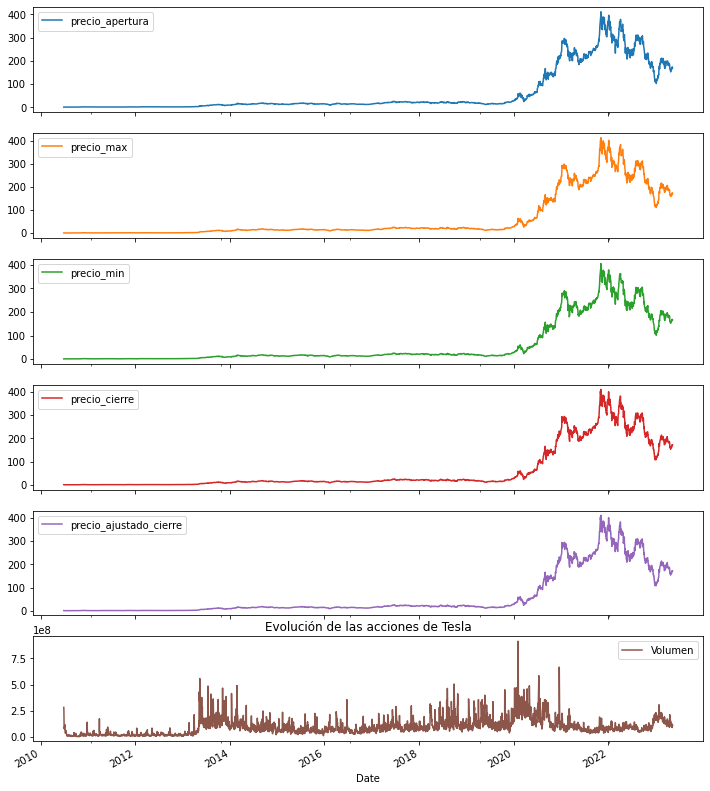

In [16]:
df.plot(subplots=True, figsize=(12,15))
plt.title('Evolución de las acciones de Tesla')

plt.show()

# Los cuatro componentes de una serie de tiempo

Dado que el análisis de series de tiempo implica comprender varios aspectos sobre la naturaleza de la serie para predecir valores futuros, a continuación se presentan los cuatro componentes teóricos de las series de tiempo que corresponden a sus características.

### 1. Tendencia o componente tendencial

El componente de tendencia recoge las variaciones en los datos con la variable de tiempo o la frecuencia de los datos, por lo que le permite analizar el aumento o la disminución de los datos a lo largo del tiempo. 
Como ejemplos podríamos tener a las cotizaciones en bolsa de las acciones de las empresas, las ventas, entre otras.



En otras palabras, la tendencia es la dirección a largo plazo de la serie temporal y visualmente cuando hay una tendencia marcada se assemeja a la siguiente figura:

![image.png](https://raw.githubusercontent.com/marcecevallos/UDLA_Analitica_predictiva/main/An%C3%A1lisis%20de%20series%20de%20tiempo/tendencia.png)

_Fuente: Australian transport assessment and planning: Forecasting and evaluation_

### 2. Ciclo o componente cíclico

Son oscilaciones o componentes recurrentes en la serie de tiempo que pueden o no ser periódicas. Si las oscilaciones duran más de un año se consideran cíclicas. 

Este componente, suelen representar a las etapas de bonanza económica así también como las crisis económicas, sin embargo, los ciclos económicos resultan difícil de reconocer, por lo que en la práctica, muchas veces no se consiguen separar de la tendencia y visualmente se representa así:

![image.png](https://raw.githubusercontent.com/marcecevallos/UDLA_Analitica_predictiva/main/An%C3%A1lisis%20de%20series%20de%20tiempo/ciclo.png)

_Fuente: Australian transport assessment and planning: Forecasting and evaluation_

### 3. Estacionalidad o componente estacional

La estacionalidad es el componente periódico de la serie de tiempo que ocurre dentro de un año, que identifica a las variaciones que ocurren a intervalos regulares de tiempo, como ocurren alrededor del mismo período de tiempo. Como ejemplos tenemos a feriados, temporadas, festivales, entre otros.

Visualmente el componente estacional se ve aprecia como la siguiente figura:


![image.png](https://raw.githubusercontent.com/marcecevallos/UDLA_Analitica_predictiva/main/An%C3%A1lisis%20de%20series%20de%20tiempo/seasonal.png)

_Fuente: Australian transport assessment and planning_

#### Propiedad de estacionariedad

Una serie de tiempo que tiene las mismas propiedades estadísticas a lo largo del tiempo es estacionaria, requisito en el análisis de series de tiempo.

Este es un requisito, en la medida que en su ausencia, un modelo que describa los datos variará en precisión en diferentes momentos, por lo que para que el modelo sea confiable, la media, varianza y correlaciones, deben poder describir con precisión los datos en todos los puntos de interés en el tiempo.

### 4. Componente irregular

El componente irregular corresponde a las variaciones aleatorias en la serie de tiempo. Es conocido también como "ruido" y recoge alteraciones de la serie, que no responden a ninguno de los anteriores componentes, por lo que recoge todo lo que no queda explicado por el modelo. Como ejemplos de este componente podemos tener a circunstancias imprevistas como desastres naturales o pandemias de corta duración. 

Gráficamente se visualizan como:

![image.png](https://raw.githubusercontent.com/marcecevallos/UDLA_Analitica_predictiva/main/An%C3%A1lisis%20de%20series%20de%20tiempo/ruido.png)

_Fuente: Australian transport assessment and planning_

En sí el componente irregular, o error es lo que queda de la serie temporal después de eliminar los otros componentes y la estacionariedad.

Por lo que, la serie de los residuos, es una serie temporal también que recoge la diferencia entre un valor observado y un valor predicho, a partir de un modelo de serie temporal, en un momento determinado. El punto clave es que si nuestro modelo de serie de tiempo, es capaz de explicar la correlación serial en las observaciones, entonces los residuos no están correlacionados serialmente.

Esto significa que cada elemento de la serie residual no correlacionada en la serie es una realización independiente de alguna distribución de probabilidad. Es decir, los residuos mismos son independientes e idénticamente distribuidos (i.i.d.). Esto nos lleva al concepto de Random Walk.

### Random Walk o paseo aleatorio

Un paseo aleatorio es un modelo de series de tiempo en el que la observación actual es igual a la observación anterior con un paso aleatorio hacia arriba o hacia abajo, por lo que la serie no se puede predecir sobre la base de la historia pasada. En otras palabras, es un proceso estocástico que consiste en la suma de una secuencia de cambios en una variable aleatoria. Estos cambios no están correlacionados con cambios pasados, lo que significa que no existe un patrón en los cambios en la variable aleatoria y estos cambios no se pueden predecir. 

Se define formalmente a continuación:

$$ X_t = X_{t_-1} + w_t $$

Donde 𝑤𝑡 es ruido blanco o una serie de tiempo donde los elementos son independientes e idénticamente distribuidos (i.i.d.), con una media de cero, varianza y sin correlación serial, entonces decimos que la serie temporal es un ruido blanco discreto (DWN). En resumen, el ruido blanco es cualquier distribución que tenga: 
- Cero media
- Una varianza/desviación estándar constante (no cambia con el tiempo)
- Autocorrelación cero en todos los retrasos

Por lo que, es una serie de números aleatorios y, por definición, ningún algoritmo puede modelar razonablemente su comportamiento.

_Nota No.2: Una confusión común es pensar en una caminata aleatoria es una simple secuencia de números aleatorios. Este no es el caso porque, en una caminata aleatoria, cada paso depende del paso anterior. Por esta razón, la autocorrelación es distinta de cero._

##  Descomposición de la serie de tiempo por el modelo de Aditivo

El valor de la serie temporal suele ser una combinación de los componentes anteriores en cualquier punto del tiempo, y pueden ser producto de la suma de todos los componentes, la multiplicación o una interacción entre las dos operaciones. Por ello, existen tres modelos comunmente usados en el análisis de series de tiempo: 

Un modelo aditivo sugiere que los componentes de las serie de tiempo se pueden adicionar ya que  la amplitud de las variaciones estacionales e irregulares no cambia a medida que el nivel de la tendencia sube o baja. En tales casos, un modelo aditivo es apropiado.

Matemáticamente se describe como:

$$ Y(t) = Tendencia + estacionalidad + ciclo + componente.irregular $$

 Si la estacionalidad y los residuos son independientes de la tendencia en la serie de tiempo graficada, usamos un modelo aditivo para descomponer los datos. Gráficamente un modelo aditivo se asemeja a la siguiente figura:

![image.png](https://raw.githubusercontent.com/marcecevallos/UDLA_Analitica_predictiva/main/An%C3%A1lisis%20de%20series%20de%20tiempo/additive%20vs%20multiplicative.png)

_Fuente: Analyticsvidhya: Time Series Forecasting | Various Forecasting Techniques_

_Nota No. 1: La diferencia entre el modelo aditivo y el multiplicativo, radica en su estructura, tal como el aditivo suma todos los componentes, el modelo multiplicativo los multiplica: 𝑌(𝑡)= 𝑇𝑒𝑛𝑑𝑒𝑛𝑐𝑖𝑎 * 𝑐𝑖𝑐𝑙𝑜 * 𝑒𝑠𝑡𝑎𝑐𝑖𝑜𝑛𝑎𝑙𝑖𝑑𝑎𝑑 * 𝑐𝑜𝑚𝑝𝑜𝑛𝑒𝑛𝑡𝑒.𝑖𝑟𝑟𝑒𝑔𝑢𝑙𝑎𝑟_ 

_Un modelo aditivo es lineal, donde los cambios a lo largo del tiempo se realizan de manera constante en la misma cantidad. Por su parte, en los modelos multiplicativos, los cambios aumentarían o disminuirían de forma no lineal con el tiempo, siendo estos cuadráticos o exponenciales._

## Manejo y descomposición de la serie en Python

#### Visualización de la serie de tiempo

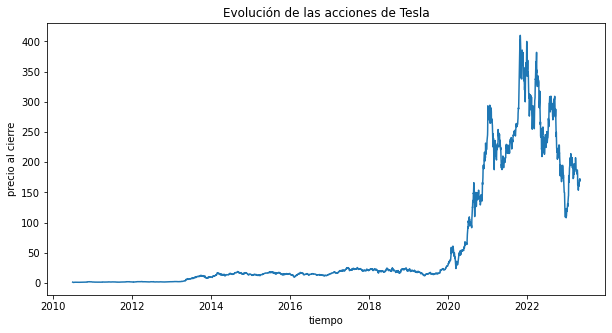

In [17]:
plt.figure(figsize=(10,5))
plt.plot(df.precio_cierre)
plt.title("Evolución de las acciones de Tesla")
plt.xlabel("tiempo")
plt.ylabel("precio al cierre")
plt.show()

Como podemos observar, la evolución de las acciones al cierre de TESLA a partir de 2020 se asemeja más a un modelo aditivo que a uno multiplicativo. Sin embargo, los datos desde su cotización en bolsa hasta antes del año 2020, son relativamente planos.

Apriori a partir del año 2020 notamos que la serie tiene una tendencia creciente y parece tener un componente cíclo dentro de un período menor a un año por lo que podríamos jugar con el argumento de período en nuestro análisis a seguir. 

In [18]:
df['fecha'] = pd.to_datetime(df.index)

In [20]:
df.fecha[0]

Timestamp('2010-06-29 00:00:00')

In [21]:
df.describe()

,precio_apertura,precio_max,precio_min,precio_cierre,precio_ajustado_cierre,Volumen
count,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3.240000e+03
mean,62.045962,63.443425,60.514169,62.011420,62.011420,9.541751e+07
std,96.292052,98.507883,93.803739,96.182335,96.182335,8.156118e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,9.550167,9.722333,9.307500,9.564833,9.564833,4.370738e+07
50%,16.508000,16.736000,16.309999,16.514667,16.514667,7.758900e+07
75%,38.063000,38.929999,37.065167,37.837666,37.837666,1.211697e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [22]:
df.isna().sum()

precio_apertura           0
precio_max                0
precio_min                0
precio_cierre             0
precio_ajustado_cierre    0
Volumen                   0
fecha                     0
dtype: int64

### Descomposición de las acciones de TESLA

Como la mayoría de las series de tiempo no son estacionales, y este es un requisito para modelarlas, tenemos que recurrir a técnicas de descomposición para separar los componentes y lograr que los componentes no dependan del tiempo.

Existen varios métodos para lograr el acometido, por ejemplo: remover la tendencia con trasnformaciones a la data, restar rolling means, o realizar el análisis de descomposición de componentes por statsmodels:

Comencemos con la descomposición de las acciones de TESLA en Python, para ello por favor instalen el module seasonal_decompose via pip.

![image.png](https://raw.githubusercontent.com/marcecevallos/UDLA_Analitica_predictiva/main/An%C3%A1lisis%20de%20series%20de%20tiempo/pip_seasonal_decompose.png)

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

El argumento de period es uno de los más importantes de esta función, y aunque no tenemos forma de conocerlo, podemos intuirlo. Varios artículos sugieren que cuando se tiene datos diarios como en nuestro caso se pruebe con 3 opciones:

- 5  : porque ese es el número de días que la bolsa se encuentra abierta por semana, 
- 20 : porque es el número de días que  la bolsa se encuentra abierta por mes, y
- 253: porque es el número de días que  la bolsa se encuentra abierta por año aproximadamente

Para este ejemplo, iniciaremos con la de menor granuladidad para observar qué resultados obtenemos.

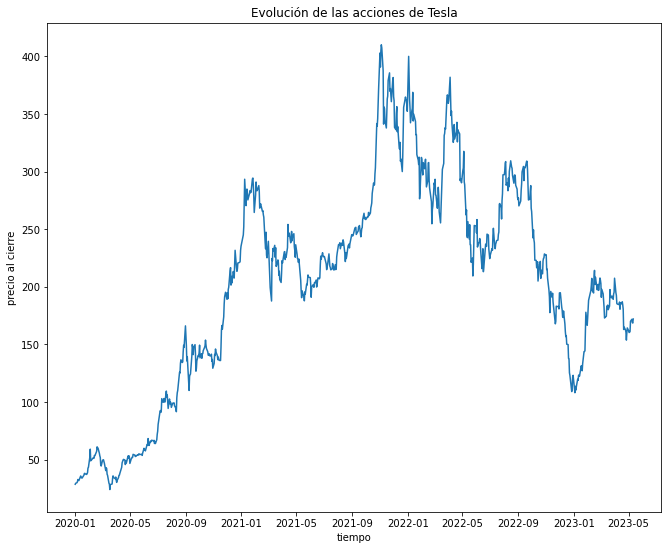

In [25]:
plt.plot(c)
plt.title("Evolución de las acciones de Tesla")
plt.xlabel("tiempo")
plt.ylabel("precio al cierre")
plt.show()

In [131]:
result1 = seasonal_decompose(df.precio_cierre[df.index>"2020"], model='multiplicative', period=253)
# La frecuencia es diaria

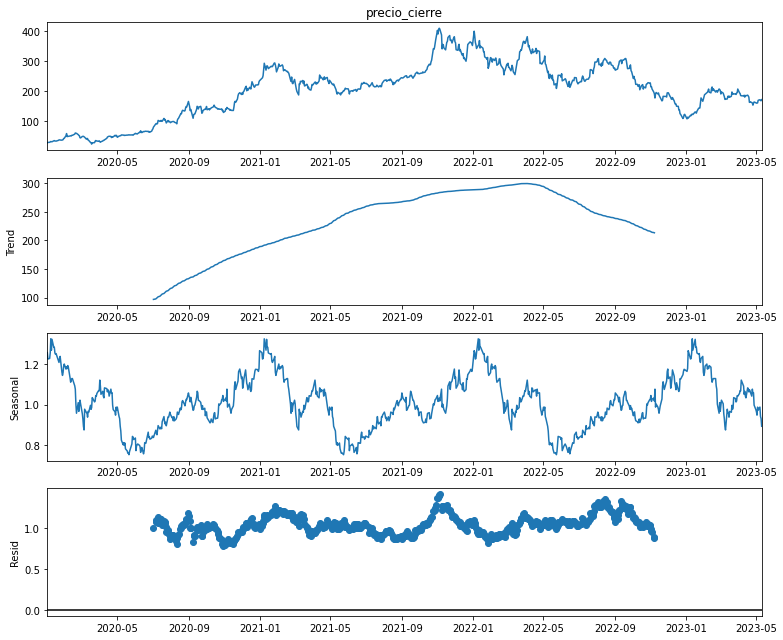

In [132]:
result1.plot()
plt.show()

La primera gráfica representa nuestra serie de Tesla original, mientras que el segundo gráfico representa la tendencia de nuestro modelo de serie temporal extraído de la serie original. Finalmente, los gráficos tercero y cuarto representan la estacionalidad y los componentes residuales en la misma serie de tiempo.

Perfecto! Interpretemos los gráficos de resultados:

- Del gráfico de tendencia observamos que efectivamente existe una tendencia creciente
- Del gráfico de ciclo, se puede observar de igual manera que existe un componente estacional
- Del gráfico de los residuos, el componente  parece ser aleatorio 

#### Extraigamos los componentes de la serie de tiempo

In [133]:
tendencia1 = result1.trend
estacional1 = result1.seasonal
residuo1 = result1.resid

In [134]:
tendencia1.isnull().sum()

252

In [135]:
pd.set_option('display.max_rows', None)

In [136]:
residuo1

Date
2020-01-02         NaN
2020-01-03         NaN
2020-01-06         NaN
2020-01-07         NaN
2020-01-08         NaN
2020-01-09         NaN
2020-01-10         NaN
2020-01-13         NaN
2020-01-14         NaN
2020-01-15         NaN
2020-01-16         NaN
2020-01-17         NaN
2020-01-21         NaN
2020-01-22         NaN
2020-01-23         NaN
2020-01-24         NaN
2020-01-27         NaN
2020-01-28         NaN
2020-01-29         NaN
2020-01-30         NaN
2020-01-31         NaN
2020-02-03         NaN
2020-02-04         NaN
2020-02-05         NaN
2020-02-06         NaN
2020-02-07         NaN
2020-02-10         NaN
2020-02-11         NaN
2020-02-12         NaN
2020-02-13         NaN
2020-02-14         NaN
2020-02-18         NaN
2020-02-19         NaN
2020-02-20         NaN
2020-02-21         NaN
2020-02-24         NaN
2020-02-25         NaN
2020-02-26         NaN
2020-02-27         NaN
2020-02-28         NaN
2020-03-02         NaN
2020-03-03         NaN
2020-03-04         NaN
2020-0

#### Rolling centered window

Este comportamiento se da por la ventana deslizante centrada a los datos, así, si se tiene:

10,20,30,40,50  y se aplica la ventana deslizante de tamaño 3, la primera ventana será 10,20,30, y el valor se colocará en el segundo dato y así sucesivamente

#### Importemos la prueba de Dickey Fuller para validar estacionariedad

In [137]:
from statsmodels.tsa.stattools import adfuller

In [138]:
X1 = residuo1.dropna()
result_DF = adfuller(X1)
print('ADF Statistic: %f' % result_DF[0])
print('p-value: %f' % result_DF[1])
print('Critical Values:')
for key, value in result_DF[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.192679
p-value: 0.020412
Critical Values:
	1%: -3.442
	5%: -2.867
	10%: -2.569


Ejecutar la función, imprime el valor de la estadística de prueba de -3.43, cuanto más negativa sea esta estadística, más probable es que rechacemos la hipótesis nula (Ho: No tenemos un conjunto de datos estacionario).

Como parte del resultado, obtenemos una tabla de consulta para ayudar a determinar la estadística ADF. Podemos ver que nuestro valor estadístico de -3.44 es menor que el valor de -3.19 al 1%, y a -2.86 al 5%, por lo que podemos rechazar la hipótesis nula con un nivel de significancia del 1% y 5%.

Rechazar la hipótesis nula significa que el proceso no tiene raíz unitaria y, a su vez, que la serie temporal es estacionaria o no tiene una estructura dependiente del tiempo.

### Para finalizar: 

Comparemos los demás modelos con los otros dos períodos y escojamos el modelo que alcance el menor p-valor en la prueba de Dickey Fuller.

In [139]:
result2 = seasonal_decompose(df.precio_cierre[df.index>"2020"], model='additive', period=20)

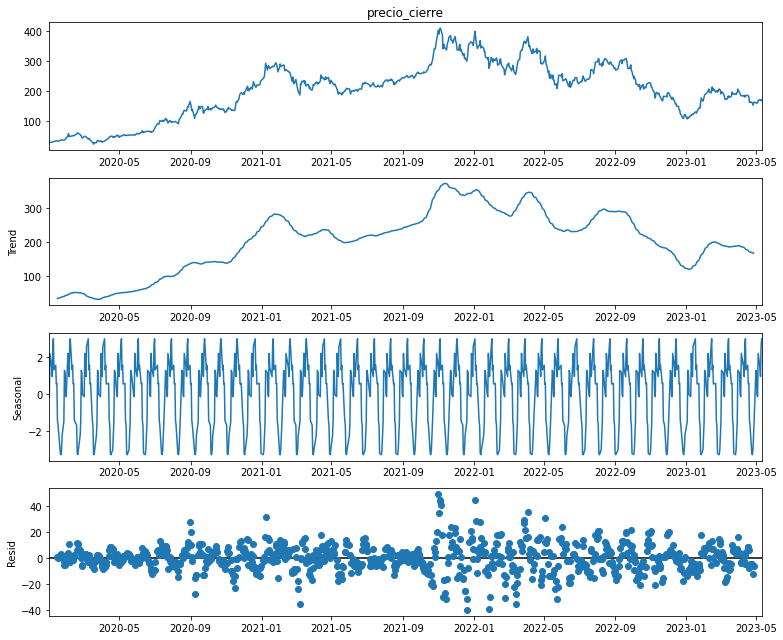

In [140]:
result2.plot()
plt.show()

Perfecto! Interpretemos los gráficos de resultados:

- Del gráfico de tendencia observamos que efectivamente existe una tendencia creciente aunque menos clara que con el parámetro de 253
- Del gráfico de ciclo, se puede observar de igual manera que existe un componente estacional
- Del gráfico de los residuos, el componente  parece ser aleatorio más en la última sección de la serie 

#### Extraigamos los componentes de la serie de tiempo

In [143]:
tendencia2 = result2.trend
estacional2 = result2.seasonal
residuo2 = result2.resid

#### Importemos la prueba de Dickey Fuller para validar estacionariedad

In [144]:
X2 = residuo2.dropna()
result_DF2 = adfuller(X2)
print('ADF Statistic: %f' % result_DF2[0])
print('p-value: %f' % result_DF2[1])
print('Critical Values:')
for key, value in result_DF2[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -9.097855
p-value: 0.000000
Critical Values:
	1%: -3.438
	5%: -2.865
	10%: -2.569


Ejecutar el ejemplo imprime el valor de la estadística de prueba de -8.09, cuanto más negativa sea esta estadística, más probable es que rechacemos la hipótesis nula (Ho: No tenemos un conjunto de datos estacionario).

Como parte del resultado, obtenemos una tabla de consulta para ayudar a determinar la estadística ADF. Podemos ver que nuestro valor estadístico de -8.25 es menor que el valor de -3.44 al 1%, y a -2.864 al 5%, por lo que podemos rechazar la hipótesis nula con un nivel de significancia del 1% y 5%.

Rechazar la hipótesis nula significa que el proceso no tiene raíz unitaria y, a su vez, que la serie temporal es estacionaria o no tiene una estructura dependiente del tiempo.

Para finalizar, comparemos los otros dos modelos con el de mayor granularidad que corresponde al período de 5 o 5 días a la semana.

In [145]:
result3 = seasonal_decompose(df.precio_cierre[df.index>"2020"], model='additive', period=5)

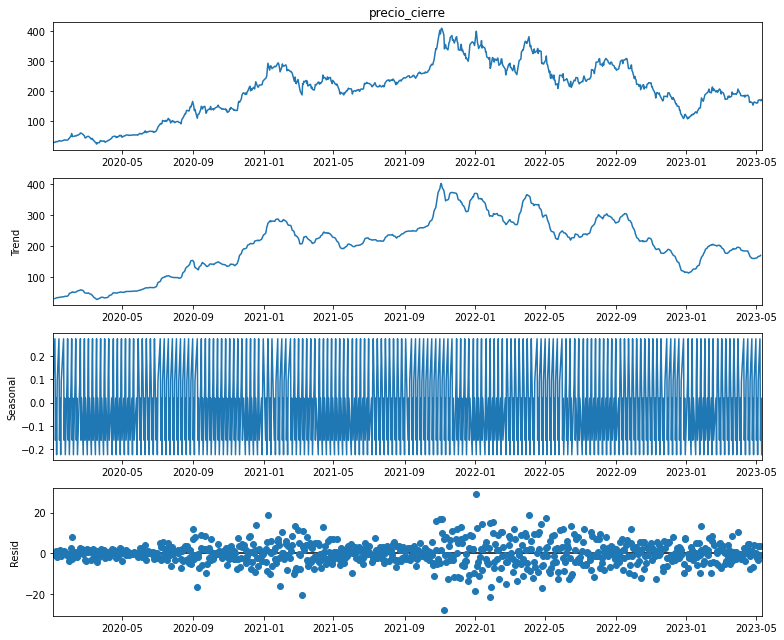

In [146]:
result3.plot()
plt.show()

Perfecto! Interpretemos los gráficos de resultados:

- Del gráfico de tendencia observamos que efectivamente existe una tendencia creciente aunque menos clara que con el parámetro de 253
- Del gráfico de ciclo, se puede observar de igual manera que existe un componente estacional pero como el período es pequeño los resultados se encuentran casi sobrepuestos
- Del gráfico de los residuos, el componente  parece ser aleatorio en la última sección de la serie 

#### Extraigamos los componentes de la serie de tiempo

In [147]:
tendencia3 = result3.trend
estacional3 = result3.seasonal
residuo3 = result3.resid

#### Importemos la prueba de Dickey Fuller para validar estacionariedad

In [149]:
X3 = residuo3.dropna()
result_DF3 = adfuller(X3)
print('ADF Statistic: %f' % result_DF3[0])
print('p-value: %f' % result_DF3[1])
print('Critical Values:')
for key, value in result_DF3[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -10.431552
p-value: 0.000000
Critical Values:
	1%: -3.438
	5%: -2.865
	10%: -2.569


Ejecutar el ejemplo imprime el valor de la estadística de prueba de -10.43, cuanto más negativa sea esta estadística, más probable es que rechacemos la hipótesis nula (Ho: No tenemos un conjunto de datos estacionario).

Como parte del resultado, obtenemos una tabla de consulta para ayudar a determinar la estadística ADF. Podemos ver que nuestro valor estadístico de -13.65 es menor que el valor de -3.44 al 1%, y a -2.864 al 5%, por lo que podemos rechazar la hipótesis nula con un nivel de significancia del 1% y 5%.

Rechazar la hipótesis nula significa que el proceso no tiene raíz unitaria y, a su vez, que la serie temporal es estacionaria o no tiene una estructura dependiente del tiempo.

### Conclusión: 

Si comparamos los p-valor de los 3 modelos, observamos que todos pasan la prueba de estacionariedad por Dickey Fuller. En este caso, escogeremos el modelo con el menor p-valor sin llegar al tercer modelo, ya que los datos del componente estacional se sobreponen, por lo que personalmente me quedaría con el primer modelo dado que capturó de mejor manera la tendencia y ciclo.:

result1 = seasonal_decompose(df.precio_cierre, model='additive', period=253)

### Próximos pasos: 

Excelente! 

El siguiente paso es predecir, teniendo en cuenta que aunque la técnica de descomposición se usa principalmente para ayudar a analizar y comprender series temporales históricas, también puede resultar útil cuando se intenta un análisis predictivo. Así, y dado que contamos con cada componente separado, podríamos emplear métodos que se adapten mejor a cada componente.

El método a seguir va a ser, tomar los componentes obtenidos previamente, predecirlos individualmente y mediante el método aditivo los sumaremos para obtener nuestra predicción total:

$$ Y(t) = Tendencia + estacionalidad + ciclo + componente.irregular $$

Componentes obtenidos:

In [179]:
tendencia1.dropna(inplace=True)
estacional1.dropna(inplace=True)
residuo1.dropna(inplace=True)

### Loop para obtener las predicciones mediante el modelo aditivo

In [180]:
modelo_aditivo = tendencia1 + estacional1 + residuo1
df_componentes = pd.concat([tendencia1, estacional1, residuo1, modelo_aditivo, df.precio_cierre], axis=1)
df_componentes.columns = ['tendencia', 'estacional', 'residuo', 'modelo_aditivo', 'y_observado']
df_componentes.dropna(inplace=True)
df_componentes.tail(8)

,tendencia,estacional,residuo,modelo_aditivo,y_observado
Date,,,,,
2022-10-28,216.863070,1.008794,1.044567,218.916431,228.520004
2022-10-31,216.350646,1.024335,1.026733,218.401714,227.539993
2022-11-01,215.798156,1.025766,1.029191,217.853112,227.820007
2022-11-02,215.272372,1.044772,0.955847,217.272990,214.979996
2022-11-03,214.696285,1.015783,0.987277,216.699344,215.309998
2022-11-04,214.214295,1.027157,0.942909,216.184362,207.470001
2022-11-07,213.739947,1.031890,0.893559,215.665397,197.080002
2022-11-08,213.383070,1.017522,0.881071,215.281664,191.300003


Como podemos observar, los componentes de las acciones de TESLA suman nuestro valor observado. Ahora, para probar nuestro modelo, predeciremos 7 días adelante dentro del mes de abril y compararemos con los y_observados o valores reales.

Ahora, pronosticaremos el componente estacional, usando el valor de t-1. (método ingenuo estacional):

In [181]:
df_predicciones = df_componentes.iloc[-8:,:]
df_predicciones.estacional = df_componentes.iloc[-8:,:].estacional.shift(1)
df_predicciones = df_predicciones.drop('y_observado', axis=1)
df_predicciones[['tendencia', 'residuo', 'modelo_aditivo']] = np.nan
df_predicciones

,tendencia,estacional,residuo,modelo_aditivo
Date,,,,
2022-10-28,NaN,NaN,NaN,NaN
2022-10-31,NaN,1.008794,NaN,NaN
2022-11-01,NaN,1.024335,NaN,NaN
2022-11-02,NaN,1.025766,NaN,NaN
2022-11-03,NaN,1.044772,NaN,NaN
2022-11-04,NaN,1.015783,NaN,NaN
2022-11-07,NaN,1.027157,NaN,NaN
2022-11-08,NaN,1.031890,NaN,NaN


Los valores del modelo_aditivo, se pronostican entonces usando simplemente la última tendencia y los últimos valores de tendencia y residuo (método ingenuo). Por supuesto, aquí también podríamos usar una técnica más compleja como un modelo ARMA no estacional pero por el momento lo mantendremos sencillo.

In [182]:
df_predicciones['tendencia'] = df_componentes.loc[df_predicciones.index[-1]].tendencia
df_predicciones['residuo'] = df_componentes.loc[df_predicciones.index[-1]].residuo
df_predicciones['modelo_aditivo'] = df_predicciones['tendencia'] + df_predicciones['estacional'] + df_predicciones['residuo']
df_predicciones['y_observado'] = df_componentes.iloc[-8:,:].y_observado
df_predicciones.dropna(inplace=True)
df_predicciones

,tendencia,estacional,residuo,modelo_aditivo,y_observado
Date,,,,,
2022-10-31,213.38307,1.008794,0.881071,215.272935,227.539993
2022-11-01,213.38307,1.024335,0.881071,215.288476,227.820007
2022-11-02,213.38307,1.025766,0.881071,215.289907,214.979996
2022-11-03,213.38307,1.044772,0.881071,215.308913,215.309998
2022-11-04,213.38307,1.015783,0.881071,215.279924,207.470001
2022-11-07,213.38307,1.027157,0.881071,215.291298,197.080002
2022-11-08,213.38307,1.031890,0.881071,215.296032,191.300003


### Comparamos las predicciones

In [183]:
df_predicciones['diferencia']=df_predicciones.y_observado - df_predicciones.modelo_aditivo
df_predicciones

,tendencia,estacional,residuo,modelo_aditivo,y_observado,diferencia
Date,,,,,,
2022-10-31,213.38307,1.008794,0.881071,215.272935,227.539993,12.267058
2022-11-01,213.38307,1.024335,0.881071,215.288476,227.820007,12.531531
2022-11-02,213.38307,1.025766,0.881071,215.289907,214.979996,-0.309912
2022-11-03,213.38307,1.044772,0.881071,215.308913,215.309998,0.001084
2022-11-04,213.38307,1.015783,0.881071,215.279924,207.470001,-7.809923
2022-11-07,213.38307,1.027157,0.881071,215.291298,197.080002,-18.211297
2022-11-08,213.38307,1.031890,0.881071,215.296032,191.300003,-23.996029


Perfecto, hemos predicho mediante el método básico. 

Como podemos ver, el modelo por descomposición tiene algunas fuertes diferencias en el mes de abril del presente año, por ello ahora aplicaremos técnicas más avanzadas como lo son los modelos autoregresivos y de medias móviles.

### Mejoremos las prediciones!

Creemos una funci'on para que genere valores futuros y qque no sea naive `generate_forecast`:

1. `trend` y `seasonal`: son las componentes de tendencia y estacionalidad de la serie temporal. Estas son las series que se han obtenido mediante la descomposición de la serie original.

2. `residual_mean` y `residual_std`: son la media y la desviación estándar del componente de residuos de la serie original. Estos valores se han calculado previamente y se utilizan para generar los residuos aleatorios en la predicción futura.

3. `periods`: es el número de períodos hacia el futuro para los cuales se desea generar la predicción.

4. `future_trend`: esta línea de código genera la tendencia futura, utilizando la última observación de la tendencia conocida, y luego agregando el cambio promedio de la tendencia en cada período futuro. El cambio promedio se calcula dividiendo la diferencia entre la última y la primera observación de la tendencia por el número total de períodos en la serie.

5. `future_seasonal`: esta línea de código extrae los últimos períodos de la componente de estacionalidad conocida, que se utilizarán como la estacionalidad futura en la predicción.

6. `future_residual`: esta línea de código genera una serie de residuos aleatorios con la misma media y desviación estándar que el componente de residuos conocido.

7. Por último, se devuelve la suma de la tendencia futura, la estacionalidad futura y los residuos futuros para cada período.

In [184]:
tendencia1.tail(3)

Date
2022-11-04    214.214295
2022-11-07    213.739947
2022-11-08    213.383070
Name: trend, dtype: float64

In [185]:
tendencia1.iloc[-1]

213.38306996944866

In [176]:
residual_mean = np.mean(residuo1)
residual_std = np.std(residuo1)

In [177]:
# Define a function to generate future values based on the decomposed components
def generate_forecast(trend, seasonal, residual_mean, residual_std, periods=1):
    future_trend = trend.iloc[-1] + np.arange(1, periods+1) * ((trend.iloc[-1] - trend.iloc[0]) / (len(trend)-1))
    future_seasonal = seasonal.iloc[-periods:]
    future_residual = np.random.normal(residual_mean, residual_std, periods)
    return future_trend + future_seasonal + future_residual

In [178]:
# Generate a forecast for the next 10 periods
forecast = generate_forecast(tendencia1, estacional1, residual_mean, residual_std, periods=1)

# Print the forecasted values
print(forecast)

Date
2023-05-11    215.49059
Name: seasonal, dtype: float64
